In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


In [2]:
allrain = []
for i in range(1,8):
    data = pd.read_csv(r'C:\Users\Demon\Desktop\all raingauges\rainfall'+str(i)+'.csv')
    allrain.append(data)
merged = pd.concat(allrain, axis= 0, sort=False)

In [3]:
allinone = pd.DataFrame(columns =['date'])
allrain[0].iloc[:,0] = pd.to_datetime(allrain[0].iloc[:,0], format ='%m/%d/%Y %H:%M') 
allinone.loc[:,'date'] = allrain[0][allrain[0].id == 1].iloc[:,0]

In [4]:
for i in range(1,34):
    allinone[str(i)] = merged[merged.id == i].val.tolist()

In [5]:
allinone.head()

,date,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,2008-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
location = pd.read_excel(r'C:\Users\Demon\Desktop\all raingauges\locations.xls')

In [7]:
location.head()

,FID,OBJECTID,ID,NAME,ADDRESS,WEB_NAME,LAT,LON,ELEV_FT,ANT_ELEV,NWS_DES,Y,X,GlobalID,webid
0,0,1,2660,PWSA (Observatory Hill),"Montana St. Pittsburgh, PA 15214",Observatory Hill,"N40° 29' 36.400""","W80° 1' 10.410""",1369.0,20,OBSP1,40.493444,-80.019558,1496a324-e962-4f81-9694-2ec0784f6719,1
1,1,2,2661,Alcosan,3300 Preble Ave Pgh. Pa. 15233,Alcosan,"N40° 28' 34.030""","W80° 2' 32.820""",737.1,6,PBWP1,40.476119,-80.042450,07fc24c5-e13b-48b2-accf-047d885372e6,2
2,2,3,2662,Shaler,"300 Wetzel Rd. Glenshaw, Pa.15116",Shaler,"N40° 31' 26.830""","W79° 58' 10.520""",945.4,6,STPP1,40.524119,-79.969589,5e186f86-1f93-4bb6-b477-912ccb6f46a8,3
3,3,4,2663,Kennedy TWP.,"Diebold Pump Station Coraopolis, Pa. 15108",KennedyTwp,"N40° 28' 31.330""","W80° 6' 48.920""",997.4,6,KYTP1,40.475369,-80.113589,e66f745d-fb59-4e70-a5d9-34af1f6ac0aa,4
4,4,5,2664,Upper St. Clair,Upper St. Clair Community & Rec. Ctr. 1551 May...,Upper St. Clair,"N40° 20' 6.180""","W80° 6' 35.280""",941.0,6,USCP1,40.335050,-80.109800,922be92f-5673-490e-8fbe-497ce11b81ae,5


In [8]:
class kmeans():
    def __init__(self,c, data):
        kdata = data.copy()
        kmeans = KMeans(n_clusters = c, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0).fit(kdata)
        n_r = len(data)
        n_c = len(data.columns)
        cost_ = kmeans.inertia_   
        kdata['cluster'] = kmeans.labels_
        self.cost = cost_
        self.data = kdata
        self.label = kmeans.labels_ 

In [9]:
kd = allinone.iloc[:,1:].T

In [73]:
cluster_results = pd.DataFrame()
distance= []
for i in range(2,30):
    km = kmeans(i, kd)
    
    cluster_results[str(i)] = km.label
    distance.append(km.cost)

In [48]:
kk = KMeans(n_clusters = 7, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0).fit(allinone.iloc[:,1:].T)

In [49]:
location['label'] = kk.labels_

In [67]:
cluster_results

,2,3,4,5,6,7,8,9,10,11,...,20,21,22,23,24,25,26,27,28,29
0,1,0,1,3,4,1,7,1,2,9,...,0,6,13,0,0,19,21,2,27,24
1,1,0,2,3,1,3,0,2,0,4,...,9,2,0,4,3,3,3,24,7,2
2,1,0,1,3,4,1,7,1,2,9,...,0,6,13,0,0,19,21,2,22,12
3,1,0,2,3,1,3,0,2,0,4,...,9,13,21,4,3,21,24,21,23,21
4,1,1,2,3,1,3,0,2,5,2,...,15,17,7,2,12,23,19,7,14,15
5,1,1,2,3,1,3,0,4,5,2,...,12,1,20,20,23,0,2,26,3,19
6,1,1,2,3,2,4,0,4,5,2,...,12,1,20,17,22,22,25,18,25,22
7,1,1,1,1,4,4,5,1,6,0,...,8,11,6,9,5,9,22,20,20,16
8,1,1,1,1,2,4,5,0,6,0,...,8,11,6,9,5,9,7,9,10,1
9,1,1,1,0,4,4,5,1,6,0,...,8,11,6,9,5,9,22,20,20,16


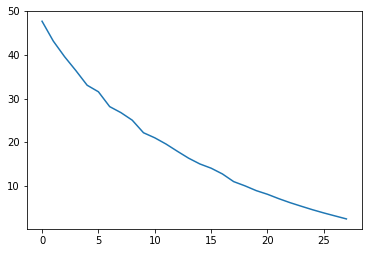

In [74]:
plt.plot(distance)

In [26]:
location['label'] = kk.labels_

In [27]:
location

,FID,OBJECTID,ID,NAME,ADDRESS,WEB_NAME,LAT,LON,ELEV_FT,ANT_ELEV,NWS_DES,Y,X,GlobalID,webid,label
0,0,1,2660,PWSA (Observatory Hill),"Montana St. Pittsburgh, PA 15214",Observatory Hill,"N40° 29' 36.400""","W80° 1' 10.410""",1369.0,20,OBSP1,40.493444,-80.019558,1496a324-e962-4f81-9694-2ec0784f6719,1,2
1,1,2,2661,Alcosan,3300 Preble Ave Pgh. Pa. 15233,Alcosan,"N40° 28' 34.030""","W80° 2' 32.820""",737.1,6,PBWP1,40.476119,-80.042450,07fc24c5-e13b-48b2-accf-047d885372e6,2,0
2,2,3,2662,Shaler,"300 Wetzel Rd. Glenshaw, Pa.15116",Shaler,"N40° 31' 26.830""","W79° 58' 10.520""",945.4,6,STPP1,40.524119,-79.969589,5e186f86-1f93-4bb6-b477-912ccb6f46a8,3,2
3,3,4,2663,Kennedy TWP.,"Diebold Pump Station Coraopolis, Pa. 15108",KennedyTwp,"N40° 28' 31.330""","W80° 6' 48.920""",997.4,6,KYTP1,40.475369,-80.113589,e66f745d-fb59-4e70-a5d9-34af1f6ac0aa,4,0
4,4,5,2664,Upper St. Clair,Upper St. Clair Community & Rec. Ctr. 1551 May...,Upper St. Clair,"N40° 20' 6.180""","W80° 6' 35.280""",941.0,6,USCP1,40.335050,-80.109800,922be92f-5673-490e-8fbe-497ce11b81ae,5,5
5,5,6,2665,Carnegie T.T.,Hammond St Carnegie Pa.,Carnegie,"N40° 24' 0.860""","W80° 5' 47.720""",840.1,6,CNGP1,40.400239,-80.096589,8e052dd1-caf0-45e3-adae-20638d5aed6a,6,5
6,6,7,2666,Greentree,Greentree Borough Maintenance Garage Poplar St...,Greentree,"N40° 25' 7.840""","W80° 3' 2.770""",1178.7,20,GTBP1,40.418844,-80.050769,0dabc021-d8e8-4db0-8af4-2b6702b082d5,7,5
7,7,8,2667,ACHD Bldg. 7 -3RWW Office,3901 Penn Ave. Pgh. Pa. 15224,Lawrenceville,"N40° 27' 55.760""","W79° 57' 38.810""",830.2,20,LVHP1,40.465489,-79.960781,f3bb5002-0066-4575-acfb-0b38e4c8185c,8,6
8,8,9,2668,Univ of Pittsburgh (Posvar Hall),"230 S. Bouquet St, Pittsburgh, PA 15213",Univ of Pittsburgh (Posvar Hall),"N40° 26' 37.640""","W79° 57' 30.280""",984.6,6,UOPP1,40.443789,-79.958411,8e06e8c9-f3d8-463c-aab5-4717aeff23f0,9,6
9,9,10,2669,Highland Park (PWSA),Mellon & N. Negley Pgh. Pa. 15222,Highland Park,"N40° 28' 47.860""","W79° 55' 21.900""",915.0,6,HLPP1,40.479961,-79.922750,ab05a2d5-d85c-4930-b952-6fb5647c3c03,10,6


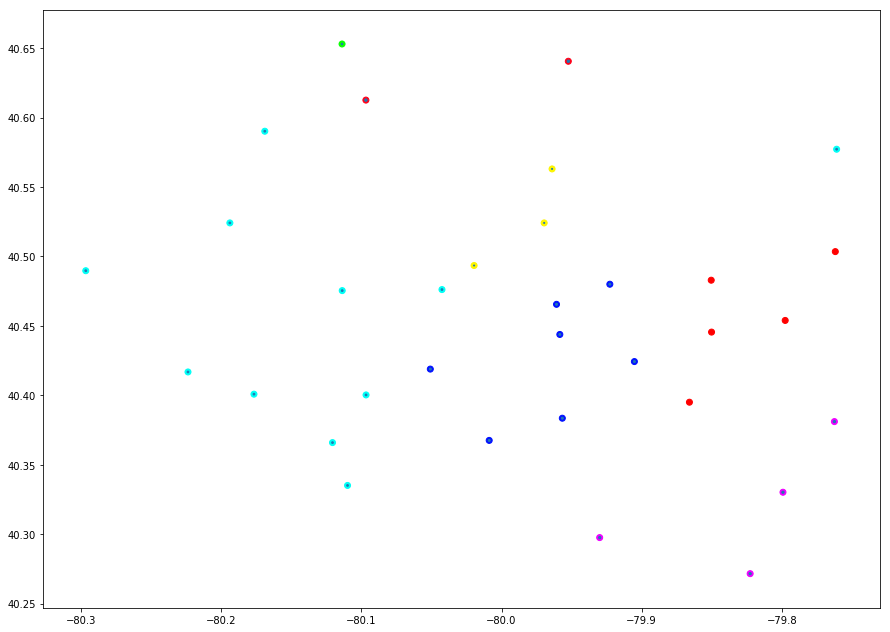

In [83]:
plt.figure(figsize=(15,11))
plt.scatter(location.X, location.Y, c= location.label,cmap = 'hsv')
plt.scatter(location.X, location.Y, s= location.label,cmap = 'hsv')
# plt.legend()
plt.savefig(r'C:\Users\ZHD22\Desktop\cluster.jpg',bbox_inches='tight')


In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
model = AgglomerativeClustering(distance_threshold = 0, n_clusters=None)

In [12]:
model1 = model.fit(kd)

In [21]:
model1.children_

array([[ 7,  9],
       [17, 21],
       [13, 19],
       [11, 15],
       [ 4, 16],
       [ 0,  2],
       [20, 28],
       [ 5,  6],
       [ 8, 33],
       [ 1,  3],
       [18, 35],
       [10, 12],
       [30, 38],
       [24, 25],
       [34, 37],
       [29, 32],
       [27, 43],
       [40, 47],
       [22, 39],
       [23, 46],
       [36, 44],
       [42, 50],
       [26, 48],
       [31, 49],
       [41, 53],
       [14, 52],
       [51, 55],
       [45, 54],
       [56, 58],
       [57, 61],
       [59, 60],
       [62, 63]], dtype=int64)

In [14]:
from scipy.cluster.hierarchy import dendrogram

In [15]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

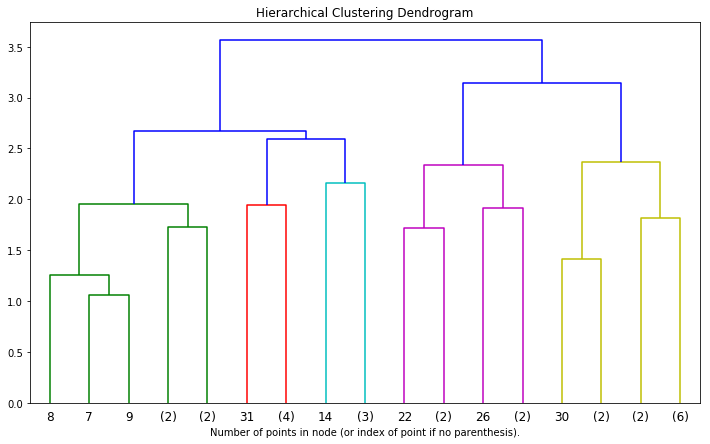

In [18]:
plt.figure(figsize = (12,7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model1, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [20]:
import sklearn
print(sklearn.__version__)

0.24.1
